# Практическое занятие

## Векторы, матрицы и матричные разложения

### Операции с векторами

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

In [2]:
x = np.array([1,0]) # Исходный вектор
theta = -40 * mt.pi / 180 # градусы в радианах
A = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) # матрица поворота
B = np.array([[-2.0, 0],[0, 1]]) # Матрица растяжения

In [3]:
x

array([1, 0])

In [4]:
# Поворачиваем вектор x
Ax = A @ x
Ax

array([ 0.76604444, -0.64278761])

In [5]:
# Вытягиваем вектор x
Bx = B @ x
Bx

array([-2.,  0.])

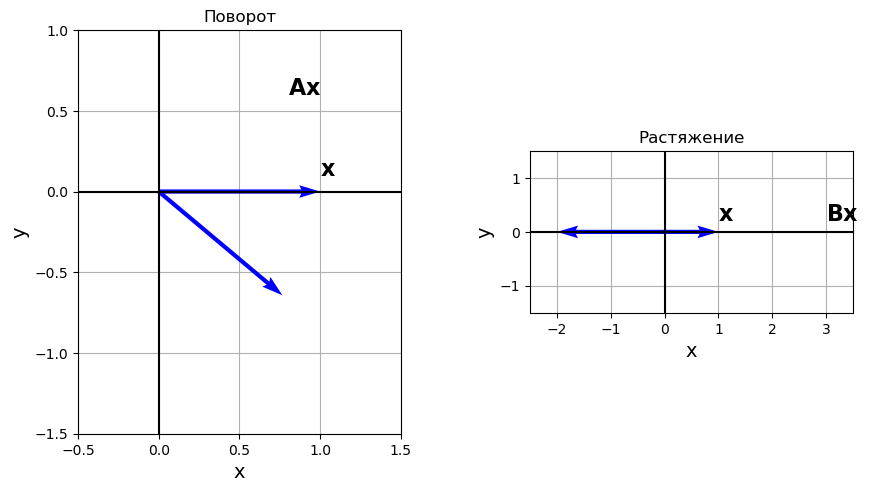

In [6]:
# Храним все векторы в одном массиве
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Храним все векторы в одном массиве
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])
origin = [0], [0] # начало координат

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(0, 0, t1[:,0][0], t1[:,1][0], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(0, 0, t1[:,0][1], t1[:,1][1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
#ax1.quiver(*origin, t1[:,0], t1[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,1.5])
ax1.set_ylim([-1.5,1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Поворот")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(0, 0, t2[:,0][0], t2[:,1][0], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.quiver(0, 0, t2[:,0][1], t2[:,1][1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
#ax2.quiver(*origin, t2[:,0], t2[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-2.5,3.5])
ax2.set_ylim([-1.5,1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Растяжение")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

### Специальные виды матриц

#### Диагональная матрица

In [7]:
v = np.array([2, 4, 3, 1])
A = np.diag(v)
A

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [8]:
# Обратная матрица диагональной матрицы тоже явлеяется диагональной
A_inv = np.linalg.inv(A)
A_inv

array([[0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [9]:
# Умножение матрицы на ее обратную матрицу = единичная матрица
A.dot(A_inv)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### Симметричная матрица

In [10]:
A = np.array([[2, 4, -1], [4, -8, 0], [-1, 0, 3]])
A

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

#### Ортогональная матрица

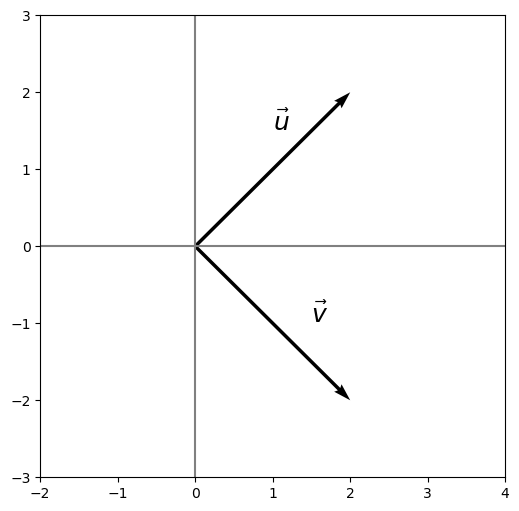

In [11]:
x = [0, 0, 2, 2]
y = [0, 0, 2, -2]

plt.figure(figsize=(6, 6))
plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

plt.show()
plt.close()

In [12]:
A = np.array([[np.cos(30), -np.sin(30)], [np.sin(30), np.cos(30)]])
A

array([[ 0.15425145,  0.98803162],
       [-0.98803162,  0.15425145]])

In [13]:
col0 = A[:, 0].reshape(A[:, 0].shape[0], 1)
col1 = A[:, 1].reshape(A[:, 1].shape[0], 1)
row0 = A[0, :].reshape(A[0, :].shape[0], 1)
row1 = A[1, :].reshape(A[1, :].shape[0], 1)

In [14]:
col0.T.dot(col1)

array([[0.]])

In [15]:
row0.T.dot(row1)

array([[0.]])

Транспонированная ортогональная матрица равна ее обратной матрице:

In [16]:
A.T

array([[ 0.15425145, -0.98803162],
       [ 0.98803162,  0.15425145]])

In [17]:
np.linalg.inv(A)

array([[ 0.15425145, -0.98803162],
       [ 0.98803162,  0.15425145]])

Произведение ортогональной матрицы на транспонированную матрицу равно единичной матрице

In [18]:
A.T.dot(A)

array([[ 1.00000000e+00, -1.28317219e-17],
       [-1.28317219e-17,  1.00000000e+00]])

### Матричное преобразование в общем виде

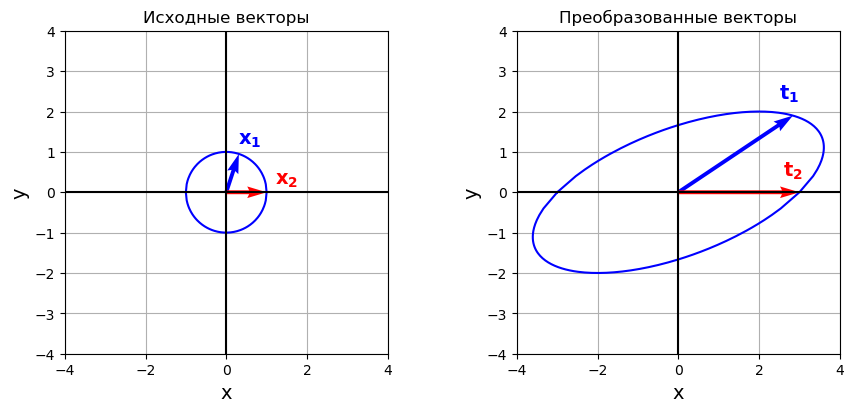

In [19]:
# Единичная окружность
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

# Несколько векторов
x_sample1 = x[:, 65]
x_sample2 = x[:, 100]

A = np.array([[3, 2],
              [0, 2]]) 

t = A @ x  # Преобразование

t_sample1 = t[:, 65]
t_sample2 = t[:, 100]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# График x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Исходные векторы")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)

# График t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Преобразованные векторы")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)

plt.show()

### Собственные векторы и собственные значения матриц

In [20]:
A = np.array([[3, 2],
              [0, 2]]) 
lam, u = LA.eig(A)
print("lambdas =", np.round(lam, 4))
print("u =", np.round(u, 4))

lambdas = [3. 2.]
u = [[ 1.     -0.8944]
 [ 0.      0.4472]]


### Симметричная матрица

lam= [3.618 1.382]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


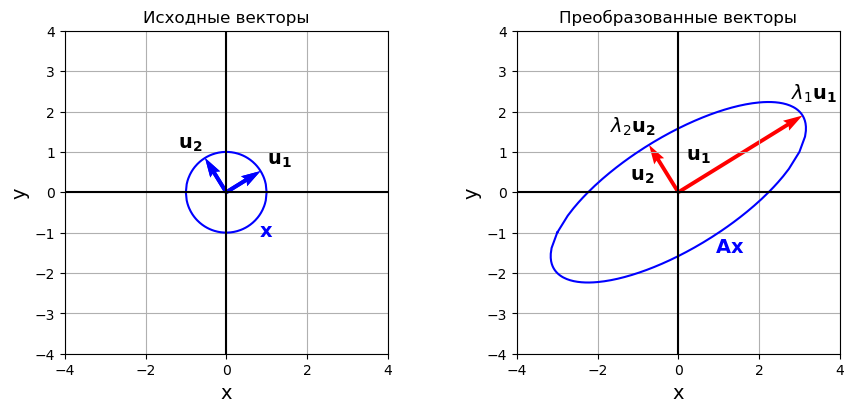

In [21]:
A = np.array([[3, 1],
             [1, 2]]) 

# A = np.array([[3, 1],
#               [1, 0.8]]) 

lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

t = A @ x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(0, 0, u[:,0][0], u[:,0][1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(0, 0, u[:,1][0], u[:,1][1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Исходные векторы")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.7, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.2, 1.1, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.8, -1.1, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(0, 0, lam[0] * u[0,0], lam[0] * u[1,0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(0, 0, lam[1] * u[0,1], lam[1] * u[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(0, 0, u[:,0][0], u[:,0][1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(0, 0, u[:,1][0], u[:,1][1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
# ax2.quiver(0, 0, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("Преобразованные векторы")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.2, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.3, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2.8, 2.3, "$\lambda_1\mathbf{u_1}$", fontsize=14)
ax2.text(-1.7, 1.5, "$\lambda_2\mathbf{u_2}$", fontsize=14)
ax2.text(0.9, -1.5, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

### PCA своими руками

In [22]:
np.random.seed(123)
x = 5*np.random.rand(100)
y = 2*x + 1 + np.random.randn(100)

x = x.reshape(100, 1)
y = y.reshape(100, 1)

X = np.hstack([x, y])
X.shape

(100, 2)

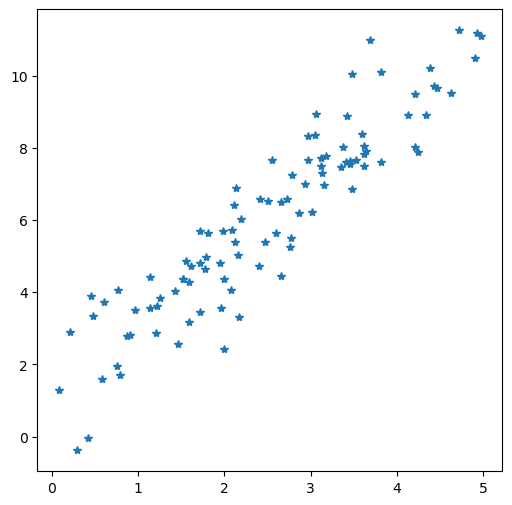

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(X[:,0], X[:,1], '*')
plt.show()

In [26]:
# Отцентрируем данные, чтобы они проходили через 0
def centerData(X):
    X = X.copy()
    X -= np.mean(X, axis = 0)
    return X

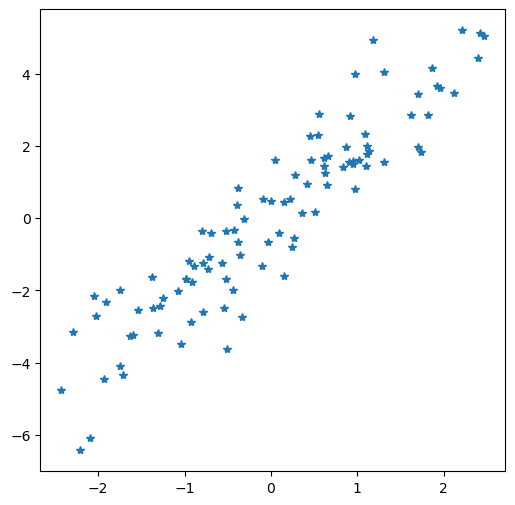

In [27]:
X_centered = centerData(X)
plt.figure(figsize=(6, 6))
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.show()

In [33]:
# Умножаем вектор на себя же странспонированного
X_centered.T.dot(X_centered)
# В результате получили симметричную матрицу

array([[150.52943921, 292.95899508],
       [292.95899508, 665.87029332]])

In [34]:
# Вычисляем собственные векторы и собственные значения:
eigVals, eigVecs = np.linalg.eig(X_centered.T.dot(X_centered))
eigVecs

array([[-0.91116273, -0.41204669],
       [ 0.41204669, -0.91116273]])

In [35]:
eigVals

array([ 18.04730409, 798.35242844])

In [38]:
# Визуализируем их
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors
    """
    plt.figure(figsize=(6, 6))
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

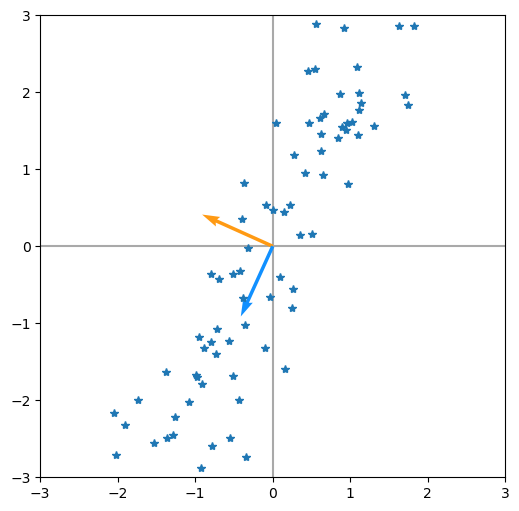

In [39]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors(eigVecs.T, [orange, blue])
plt.plot(X_centered[:,0], X_centered[:,1], '*')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [40]:
eigVals

array([ 18.04730409, 798.35242844])

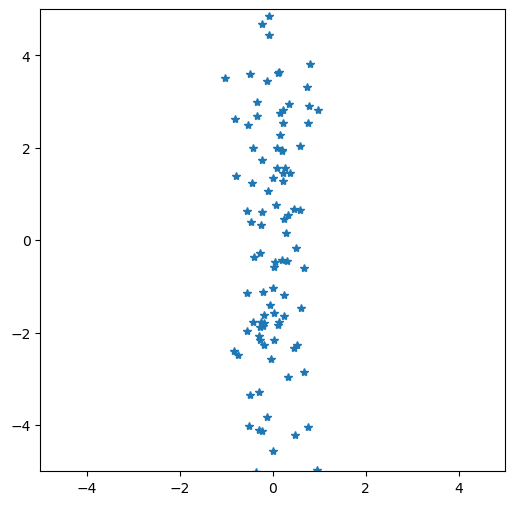

In [43]:
# Повернем данные, умножив центрированные данные на их собственные векторы
X_new = eigVecs.T.dot(X_centered.T)

plt.figure(figsize=(6, 6))
plt.plot(eigVecs.T.dot(X_centered.T)[0, :], eigVecs.T.dot(X_centered.T)[1, :], '*')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### Смена координат векторов

x_B= [[4.  ]
 [2.83]]


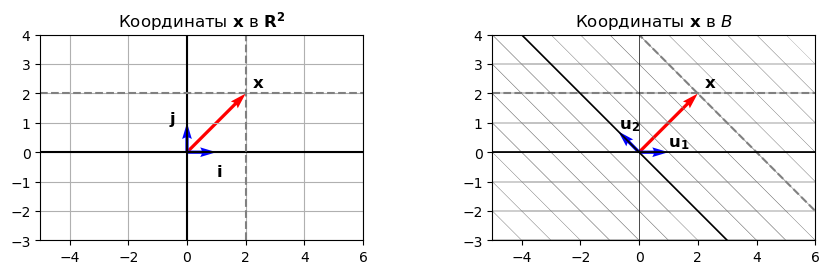

In [44]:
# Базис
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

#v_1 = np.array([[2],[0]])
#v_2 = np.array([[1],[1]])

# Матрица смены координат
p = np.concatenate([v_1, v_2], axis=1)
p_inv = np.linalg.inv(p) 

# Исходные координаты x в R^2
x=np.array([[2], [2]])

# Новые координаты в базисе B
x_B = p_inv @ x

print("x_B=", np.round(x_B, 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x in R2
ax1.quiver(*origin, x[0], x[1], color=['r'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, 1, 0, color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, 0, 1, color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)

ax1.set_xlim([-5,6])
ax1.set_ylim([-3,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Координаты $\mathbf{x}$ в $\mathbf{R^2}$")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(x[0]+0.2, x[1]+0.2, "$\mathbf{x}$", fontsize=12)
ax1.text(1, -0.8, "$\mathbf{i}$", fontsize=12)
ax1.text(-0.6, 1, "$\mathbf{j}$", fontsize=12)
ax1.axvline(x=x[0], color='grey', linestyle='--')
ax1.axhline(y=x[1], color='grey', linestyle='--')

# Plotting x in B
# Plotting the grid
multipliers = np.linspace(-10,10,100)

for i in range(-6,7,4):
    for j in range(-6,7,1):
        grid_1 = (v_1 * multipliers) + np.array([[i],[j]])
        grid_2 = (v_2 * multipliers) + np.array([[i],[j]])
        ax2.plot(grid_1[0], grid_1[1], color='grey', linewidth=0.2)
        ax2.plot(grid_2[0], grid_2[1], color='grey', linewidth=0.2)
        
# Plotting the vector guide
vector_guide_1 = (v_1 * multipliers) + x
vector_guide_2 = (v_2 * multipliers) + x
ax2.plot(vector_guide_1[0], vector_guide_1[1], color='grey', linewidth=1.5, linestyle='--')
ax2.plot(vector_guide_2[0], vector_guide_2[1], color='grey', linewidth=1.5, linestyle='--')

# Plotting the axis
vector_guide_1 = (v_1 * multipliers) + np.array([[0],[0]])
vector_guide_2 = (v_2 * multipliers) + np.array([[0],[0]])
ax2.plot(vector_guide_1[0], vector_guide_1[1], color='black', linewidth=1.2)
ax2.plot(vector_guide_2[0], vector_guide_2[1], color='black', linewidth=1.2)

ax2.quiver(*origin, x[0], x[1], color=['r'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, v_1[0], v_1[1], color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, v_2[0], v_2[1], color=['b'], width=0.01, angles='xy', scale_units='xy', scale=1)

ax2.set_xlim([-5,6])
ax2.set_ylim([-3,4])
ax2.set_aspect('equal')

ax2.set_title("Координаты $\mathbf{x}$ в $\mathit{B}$")
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.text(x[0]+0.2, x[1]+0.2, "$\mathbf{x}$", fontsize=12)
ax2.text(1, 0.2, "$\mathbf{u_1}$", fontsize=12)
ax2.text(-0.7, 0.8, "$\mathbf{u_2}$", fontsize=12)

plt.show()

### Спектральное разложение

In [45]:
A = np.array([[3, 1],
              [1, 2]])   
lam, u = LA.eig(A)

In [46]:
lam

array([3.61803399, 1.38196601])

In [47]:
u

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [48]:
u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
A_1 = lam1 * (u1 @ u1.T)
u2= u[:,1].reshape(2,1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)
print("A_1=", np.round(A_1, 4))
print("A_2=", np.round(A_2, 4))

A_1= [[2.618 1.618]
 [1.618 1.   ]]
A_2= [[ 0.382 -0.618]
 [-0.618  1.   ]]


In [49]:
A_1 + A_2

array([[3., 1.],
       [1., 2.]])

In [50]:
lam_A_1, u_A_1 = LA.eig(A_2)
print("lam=", np.round(lam_A_1, 4))
print("u=", np.round(u_A_1, 4))

lam= [0.    1.382]
u= [[-0.8507  0.5257]
 [-0.5257 -0.8507]]


In [52]:
# Общий случай
B = np.array([[3, 2],
              [0, 2]]) 
lam, u = LA.eig(B)

print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


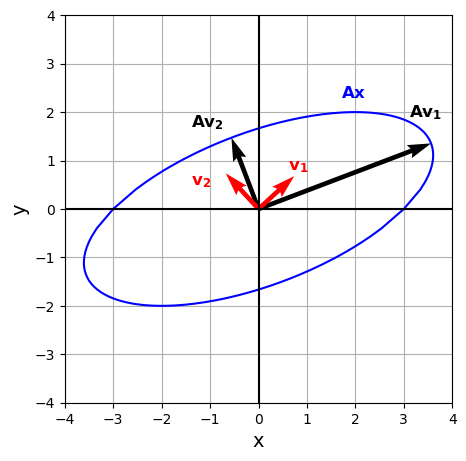

In [55]:
A = np.array([[3, 2],
              [0, 2]]) 
lam_A, u_A = LA.eig(A)

A2 = A.T @ A

lam_A2, u_A2 = LA.eig(A2)

t = A @ x   # Vectors in t are the transformed vectors of x
t1 = A2 @ x  # Vectors of A.A
Av = A @ u_A2  # Vectors Avi

fig, (ax2) = plt.subplots(1, 1, figsize=(5,10))

# Plotting Ax
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(0, 0, Av[0,:][0], Av[1,:][0], color=['black'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(0, 0, Av[0,:][1], Av[1,:][1], color=['black'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(0, 0, u_A2[0,:][0], u_A2[1,:][0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(0, 0, u_A2[0,:][1], u_A2[1,:][1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.7, 2.3, "$\mathbf{Ax}$", color="b", fontsize=12)
ax2.text(0.6, 0.8, "$\mathbf{v_1}$", color='r', fontsize=12)
ax2.text(-1.4, 0.5, "$\mathbf{v_2}$", color='r', fontsize=12)
ax2.text(3.1, 1.9, "$\mathbf{Av_1}$", color='black', fontsize=12)
ax2.text(-1.4, 1.7, "$\mathbf{Av_2}$", color='black', fontsize=12)

plt.show()

### Сингулярное разложение

In [56]:
A = np.array([[4, 1, 3],
              [8, 3, -2]])
lam, v = LA.eig(A.T @ A)
print("lam=", np.round(lam, 4))
print("v=", np.round(v, 4))

lam= [90.1167  0.     12.8833]
v= [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [57]:
A.T @ A

array([[80, 28, -4],
       [28, 10, -3],
       [-4, -3, 13]])

In [58]:
V = v[:, lam.argsort()[::-1]]

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sigma = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)

print("Sigma=", np.round(Sigma, 4))
print("V=", np.round(V, 4))

Sigma= [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
V= [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [59]:
r = len(sigma)
U = A @ V[:,:r] / sigma
print("U=", np.round(U, 4))

U= [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


In [60]:
A_reconstructed = U @ Sigma @ V.T
A_reconstructed

array([[ 4.,  1.,  3.],
       [ 8.,  3., -2.]])

В Питоне есть встроенная функция

In [61]:
U, s, VT = LA.svd(A)
print("U=", np.round(U, 4))
print("s=", np.round(s, 4))
print("V", np.round(VT.T, 4))

U= [[-0.4121 -0.9111]
 [-0.9111  0.4121]]
s= [9.493  3.5893]
V [[-0.9415 -0.0969 -0.3228]
 [-0.3314  0.0906  0.9391]
 [ 0.0617 -0.9912  0.1174]]


In [62]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(s)
A_reconstructed = U @ Sigma @ VT
A_reconstructed

array([[ 4.,  1.,  3.],
       [ 8.,  3., -2.]])